<a href="https://colab.research.google.com/github/llohar/Deep-learning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [7]:
# padding the input image
def zero_pad(X,pad):
  X_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),'constant',constant_values=0)
  return X_pad

x.shape is: (4, 3, 3, 2)
x_pad.shape is: (4, 7, 7, 2)
x[1,1]: [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1]: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


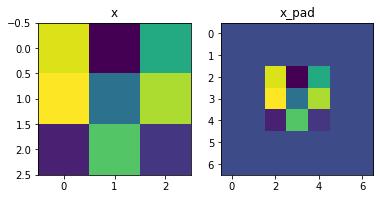

In [9]:
np.random.seed(1)
x = np.random.randn(4,3,3,2)
x_pad = zero_pad(x,2)
print("x.shape is:",x.shape)
print("x_pad.shape is:",x_pad.shape)
print("x[1,1]:",x[1,1])
print("x_pad[1,1]:",x_pad[1,1])

fig,axarr = plt.subplots(1,2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])



In [ ]:
def conv_single_step(a_slice_prev,W,b):
  s = a_slice_prev*W +b
  Z = np.sum(s)
  return Z

In [10]:
# forward propagation of conv
def conv_forward(A_prev,W,b,hparameters):
  (m,n_H_prev,n_W_prev,n_C_prev) = A_prev.shape
  (f,f,n_C_prev,n_C) = W.shape
  stride = hparameters['stride']
  pad = hparameters["pad"]
  n_H = int((n_H_prev-f+2*pad)/stride)+1
  n_W = int((n_W_prev-f+2*pad)/stride)+1
  Z = np.zeros(m,n_H,n_W,n_C)
  A_prev_pad = np.pad(A_prev,pad)

  for i in range(m):  
    a_prev_pad = A_prev_pad[i]  # looping over the training examples
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start = h*stride
          vert_end = verticle_start + f
          horiz_start = w*stride
          horiz_end = horiz_start + f  # finding the corners of the current slide
          a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
          Z[i,h,w,c] = np.sum(np.multiply(a_slice_prev,W[:,:,:,c])+b[:,:,:,c])

  assert(Z.shape == (m,n_H,n_W,n_C))  # making sure the output shape is correct
  cache = (A_prev,W,b,hparameters) # saving info in cache for back prop
  return Z,cache



        




In [11]:
# forward pooling layer implimentation
def pool_forward(A_prev,hparameters,mode='max'):
  (m,n_H_prev,n_W_prev,n_C_prev) = A_prev.shape
  f = hparameters['f']
  pad = hparameters['pad']
  n_H = int((n_H_prev-f)/stride)+1
  n_W = int(n_W_prev-f/stride)+1
  n_C = n_C_prev
  A = np.zeros((m,n_H,n_W,n_C)) # initializing output matrix A
  for i in range(m):
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start = h*stride
          vert_end = vert_start + f
          horiz_start = w*stride
          horiz_end = horiz_start + f 
          a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]  # use the corners to define the current slice on the ith training examples of A_prev,channel c
          if mode =='max':
            A[i,h,w,c] = np.max(a_prev_slice)
          elif mode == 'average':
            A[i,h,w,c] = np.mean(a_prev_slice)
  cache = (A_prev,hparameters)
  assert(A.shape == (m,n_H,n_W,c))
  return A,cache


In [ ]:
# back prop implimenation
def conv_backward(dZ,cache):
  (A_prev,W,b,hparameters) = cache
  (m,n_H,n_W,n_C) = A_prev.shape
  (f,f,n_C_prev,n_C) = W.shape
  stride = hparameters['stride']
  pad = hparameters['pad']
  (m,n_H,n_W,n_C) = dZ.shape
  dA_prev = np.zeros((m,n_H_prev,n_W_prev,n_C_prev))
  dW = np.zeros((f,f,n_C_prev,n_C))
  db = np.zeros(b.shape)
  A_prev_pad = zero_pad(A_prev,pad)
  dA_prev_pad = zero_pad(dA_prev,pad)

  for i in range(m):
    a_prev_pad = A_prev_pad[i]
    da_prev_pad = dA_prev_pad[i]
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start = h*stride
          vert_end = vert_start + f
          horiz_start = w*stride
          horiz_end = horiz_start + f
          a_slice = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
          da_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:] += W[:,:,:,c]*dZ[i,h,w,c] 
          dW[:,:,:,c] += da_slice*dZ[i,h,w,c]
          db[:,:,:,c] += dZ[i,h,w,c]
          



